##### РК ИУ5-61Б  

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
data = pd.read_csv('toy.csv', sep = ';')
data.head()

,Number,City,Gender,Age,Income,Illness,Unnamed: 6
0,1,Dallas,Male,41,40367.0,No,NaN
1,2,Dallas,Male,54,45084.0,No,NaN
2,3,Dallas,Male,42,52483.0,No,NaN
3,4,Dallas,Male,40,40941.0,No,NaN
4,5,Dallas,Male,46,50289.0,No,NaN


In [3]:
data.dtypes

Number          int64
City           object
Gender         object
Age             int64
Income        float64
Illness        object
Unnamed: 6    float64
dtype: object

In [4]:
data['Gender'].value_counts()

Male      145
Female    119
Name: Gender, dtype: int64

In [5]:
data['Illness'].value_counts()

No     240
Yes     24
Name: Illness, dtype: int64

In [6]:
data['IsGender']=data.Gender.replace({'Female':0,'Male':1})
data.drop('Gender', axis = 1, inplace = True)
data['IsIllness']=data.Illness.replace({'No':0,'Yes':1})
data.drop('Illness', axis = 1, inplace = True)

In [7]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Number          0
City            0
Age             0
Income          0
Unnamed: 6    264
IsGender        0
IsIllness       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Number      264 non-null    int64  
 1   City        264 non-null    object 
 2   Age         264 non-null    int64  
 3   Income      264 non-null    float64
 4   Unnamed: 6  0 non-null      float64
 5   IsGender    264 non-null    int64  
 6   IsIllness   264 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 14.6+ KB


In [9]:
data.head()

,Number,City,Age,Income,Unnamed: 6,IsGender,IsIllness
0,1,Dallas,41,40367.0,NaN,1,0
1,2,Dallas,54,45084.0,NaN,1,0
2,3,Dallas,42,52483.0,NaN,1,0
3,4,Dallas,40,40941.0,NaN,1,0
4,5,Dallas,46,50289.0,NaN,1,0


<AxesSubplot:>

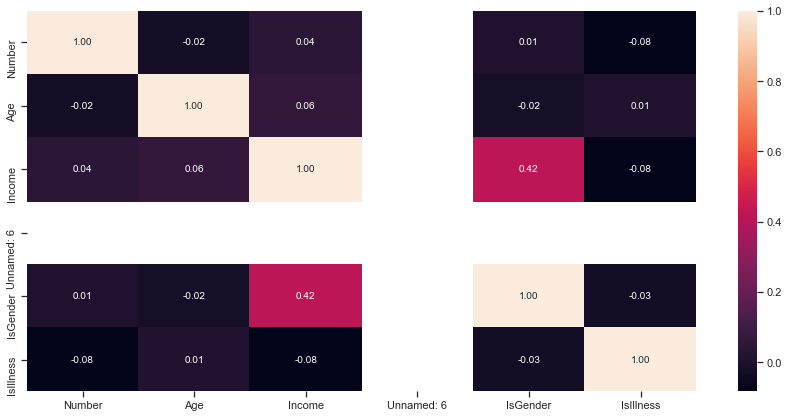

In [10]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [11]:
X = data[["Number","IsGender"]]
Y = data.Income
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Number  IsGender
0       1         1
1       2         1
2       3         1
3       4         1
4       5         1 

Выходные данные:

 0    40367.0
1    45084.0
2    52483.0
3    40941.0
4    50289.0
Name: Income, dtype: float64


In [12]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Number  IsGender
45       46         0
241     242         1
74       75         0
201     202         1
258     259         1 

Входные параметры тестовой выборки:

      Number  IsGender
136     137         1
101     102         1
240     241         1
8         9         1
181     182         1 

Выходные параметры обучающей выборки:

 45     40661.0
241    61320.0
74     27897.0
201    32404.0
258    51490.0
Name: Income, dtype: float64 

Выходные параметры тестовой выборки:

 136    43573.0
101    48433.0
240    23579.0
8      68667.0
181    48899.0
Name: Income, dtype: float64


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [15]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 4009.0148148148146
Средняя квадратичная ошибка: 38785407.00888889
Median absolute error: 3479.199999999997
Коэффициент детерминации: 0.6951589334459994


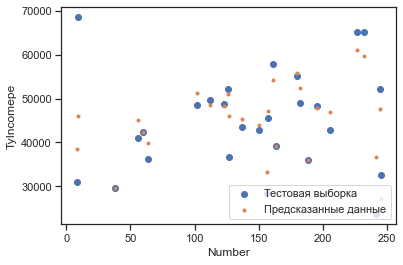

In [16]:
plt.scatter(X_test.Number, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.Number, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Number')
plt.ylabel('TyIncomepe')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [18]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 8572.444627257064
Средняя квадратичная ошибка: 118220793.76964274
Median absolute error: 7882.669448731038
Коэффициент детерминации: 0.07082184664610902


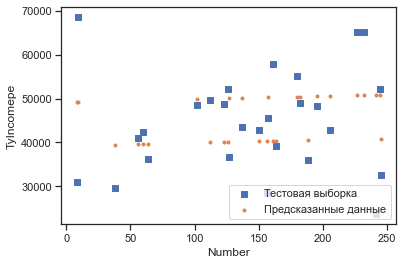

In [19]:
plt.scatter(X_test.Number, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Number, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Number')
plt.ylabel ('TyIncomepe')
plt.show()